# Homework 3 - Principal Component Analysis on Neuron Spike Sorting
You should have downloaded:
- spikes.csv

The homework performs PCA, but in a setting that will feel less familiar from simpler examples seen in lecture or section. But the underlying mathematics in identical and you will get a chance to see a more "real-life" application of PCA.

# 0 Introduction

A large amount of research in neuroscience is based on the study of the activity of neurons recorded extracellularly with microwires (very thin electrodes) implanted in animals’ brains. These microwires ‘listen’ to **a few neurons close-by** the electrode tip that fire action potentials or ‘spikes’. **Each neuron has spikes of a characteristic shape**, which is determined by a variety of factors.

Spike sorting seeks to **group spikes into clusters** based on the similarity of their shapes. Each cluster of spikes will correspond to individual neurons. Thus, we can understand neuron activity better if we can study their activity from the spikes in the data.

We will process sample neuronal voltage recordings and use Principal Component Analysis (PCA) to separate spikes.

Reference: http://www.scholarpedia.org/article/Spike_sorting

This data has been preprocesed and centered for each spike to coincide with the others. 
- There are 3298 spikes.
- Each spike contains 70 recordings representing 70 $ms$ of data. So, there are 70 features per datum.

# 1 Load and visualize data
**Task:**
1. [1 pt] Load two dimensional array `X` in which:
    - rows are the 70 voltage readings for each spike (number of features)
    - columns are observed spikes (number of data)

2. [2 pt] Display the first 30 spikes in one figure.
    - the horizontal axis would be the 70 recordings, in $ms$.
    - the vertical axis would be the voltage, in $mV$.
    - Include axis labels and a title

(70, 3298)
(70, 30)


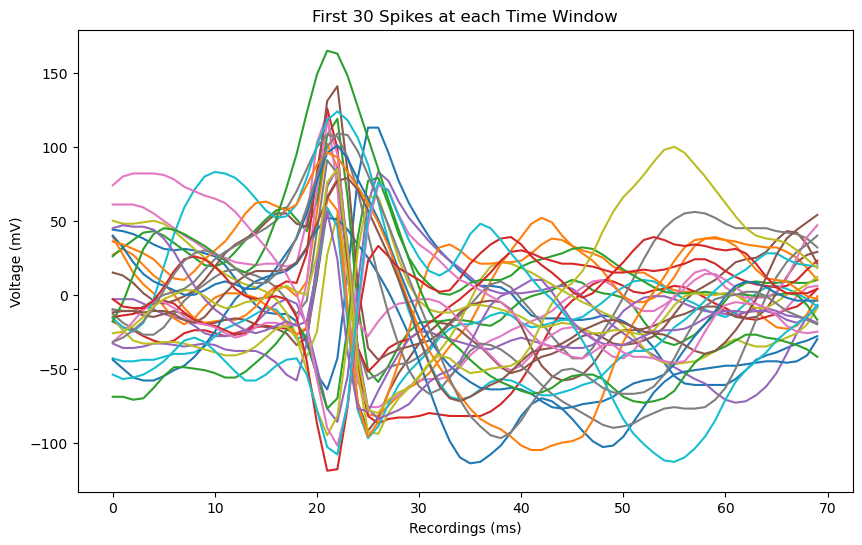

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# there are 70 features in the dataset, each representing the voltage of a recording in a time window
# each feature has 3298 observations, representing the voltage of the recording at each of the 70 time windows

# The plt.plot() function in matplotlib expects each column to represent a separate dataset (or line to be plotted), 
# and each row to represent a point along the x-axis (or an observation at a specific point in time, if you're dealing with time series data).
# In other words, if you pass a 2D array (or a DataFrame, which is treated similarly) to plt.plot(), 
# it will treat each column as a separate y dataset and the index of each row as the corresponding x value. 
# If you want to plot multiple lines and have specific x values for each y dataset, you would need to call plt.plot() multiple times,
# once for each line, or transpose your data so that each line is represented by a column.

# load the dataset
X = pd.read_csv('spikes.csv', header=None)
print(X.shape)
# each row is a reocrding, each column is a observation
X = X.to_numpy()
X_first_30 = X[:, :30]

print(X_first_30.shape)


# Plot the first 30 spikes
plt.figure(figsize=(10, 6))
plt.plot(X_first_30)

plt.xlabel('Recordings (ms)')
plt.ylabel('Voltage (mV)')
plt.title('First 30 Spikes at each Time Window')
plt.show()




# 2 PCA

We are interested in correlating ''spikes in the waveform'' to ''the activity of neurons''. 

The difficulty arrises from the fact that observed spikes can arise from the different neurons that are firing in the neighborhood of microwire (detector). Interactions (''correlation'') between spikes from different neuronal population can siginificantly change the voltage recording shape. For example, the peak of action potential from neuronal acticivity from one cell can be reduced if it concides with the dip of action potential from another cell firing. 

Historically, PCA has been proposed as a method to seperate spikes into clusters of neuronal activity. Let's try it ourselves.

## 2.1 Eigendecomposition by sklearn
**Task:** 
1. [1 pt] Center data by subtracting the mean, store it as ```data_ctd```. 
2. [4 pt] Use the sklearn PCA package to:
    - fit data
    - find covariance matrix, store it as ```cov_mat```
    - find eigenvalues/singular values, store it as ```evals``` (Rmk: singular_values_ is not singular values, Go figure. -.-)
    - find principal components, store it as ```evecs```. Your columns should be the eigenvectors. (Rmk: package gives tranposed version, i.e., rows are the principal components, not columns.)

Through this exercise, we should gain familiarity with the package and understand that you MUST read documentation before using packages.

In [11]:
from sklearn.decomposition import PCA
import numpy as np
# TODO sklearn pca
X = X.T # each row is a observation, each column is a feature
print(X.shape)
data_ctd = X - X.mean(axis = 0, keepdims = True) # center the data by taking mean along each column
# print(X.mean(axis = 0, keepdims=True))
print('data_ctd:',data_ctd.shape)

# 2. Create a PCA object

# pca expects each row to be a observation and each column to be a feature
pca = PCA()
pca.fit(X)

# find covariance matrix and store it as cov_mat
cov_mat = np.dot(data_ctd.T, data_ctd) / (data_ctd.shape[0]-1)
print(cov_mat.shape)

evals = pca.explained_variance_ 
evecs = pca.components_ # each row is a eigenvector
evecs = evecs.T # each column is a eigenvector
print("eigenvalues: ", evals.shape)
print("eigenvectors: ", evecs.shape)

print("eigenvalues: ", evals)
# print("eigenvectors: ", evecs)


(3298, 70)
data_ctd: (3298, 70)
(70, 70)
eigenvalues:  (70,)
eigenvectors:  (70, 70)
eigenvalues:  [4.79156742e+04 2.15990601e+04 1.07647570e+04 8.13269178e+03
 7.08089023e+03 3.91342080e+03 2.99855515e+03 2.77285145e+03
 1.97035523e+03 1.52078345e+03 1.23555840e+03 8.75230349e+02
 7.32396152e+02 5.18541726e+02 4.00627913e+02 2.87844048e+02
 2.12268026e+02 1.53333892e+02 1.22923744e+02 9.13714257e+01
 7.70354677e+01 6.16193980e+01 5.22824512e+01 5.03155508e+01
 4.30827252e+01 3.63309011e+01 3.15395919e+01 2.64998431e+01
 2.09134994e+01 1.77674723e+01 1.39781499e+01 9.59924857e+00
 6.76842419e+00 5.48258263e+00 3.45675520e+00 2.67873490e+00
 1.77193663e+00 1.16440604e+00 8.27206432e-01 6.71877753e-01
 4.16035900e-01 3.30889640e-01 2.20501912e-01 1.83892657e-01
 1.56138344e-01 1.45812634e-01 1.24850073e-01 1.07150480e-01
 1.03059685e-01 9.89523274e-02 9.74262409e-02 9.44111888e-02
 9.34905120e-02 9.07330868e-02 9.05334313e-02 8.88913369e-02
 8.80073268e-02 8.73127057e-02 8.64678954e-02 8

# 2.2 Scree plot
1. [1 pt] What is a "scree"? What does it mean? This is not a math question. Google it and spend 10 minutes of fun on the web.

    **Ans:** a scree plot is a plot of the eigenvalues of the covariance matrix to its component number. It is used to determine the number of principal components to retain in the analysis. The eigenvalues are plotted in descending order, and the point at which the slope of the curve changes is the "elbow" of the scree plot. The number of principal components to retain is the number of eigenvalues to the left of the elbow.
2. [2 pt] Make a scree plot of the eigenvalues of the covariance matrix.
    - Include title and axis labels

sorted eigenvalues:  [4.79156742e+04 2.15990601e+04 1.07647570e+04 8.13269178e+03
 7.08089023e+03 3.91342080e+03 2.99855515e+03 2.77285145e+03
 1.97035523e+03 1.52078345e+03 1.23555840e+03 8.75230349e+02
 7.32396152e+02 5.18541726e+02 4.00627913e+02 2.87844048e+02
 2.12268026e+02 1.53333892e+02 1.22923744e+02 9.13714257e+01
 7.70354677e+01 6.16193980e+01 5.22824512e+01 5.03155508e+01
 4.30827252e+01 3.63309011e+01 3.15395919e+01 2.64998431e+01
 2.09134994e+01 1.77674723e+01 1.39781499e+01 9.59924857e+00
 6.76842419e+00 5.48258263e+00 3.45675520e+00 2.67873490e+00
 1.77193663e+00 1.16440604e+00 8.27206432e-01 6.71877753e-01
 4.16035900e-01 3.30889640e-01 2.20501912e-01 1.83892657e-01
 1.56138344e-01 1.45812634e-01 1.24850073e-01 1.07150480e-01
 1.03059685e-01 9.89523274e-02 9.74262409e-02 9.44111888e-02
 9.34905120e-02 9.07330868e-02 9.05334313e-02 8.88913369e-02
 8.80073268e-02 8.73127057e-02 8.64678954e-02 8.58714200e-02
 8.46800323e-02 8.29770059e-02 8.12261516e-02 8.10346008e-02
 7.

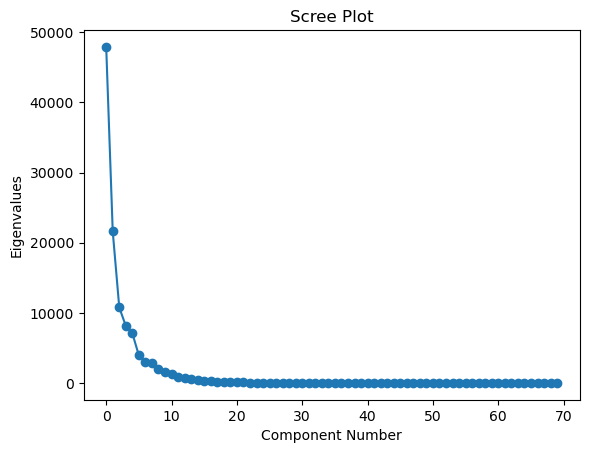

In [12]:
import numpy as np
# TODO plot

# Sort eigenvalues in descending order
sorted_indices = np.argsort(evals)[::-1]
sorted_evals = evals[sorted_indices]

print("sorted eigenvalues: ", sorted_evals)

plt.plot(sorted_evals, 'o-')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.show()
 

# 3 Eigenbasis
## 3.1 Visualization of principal components
1. [2 pt] Generate a 2D plot to display the first 4 principal components.
- Each PC is basically a spike signal, like those plotted earlier. This is how we will visualize a 70-dimensional vector in a two dimensional plot.
- Include a title, legend, and axis labels.

(70, 70)


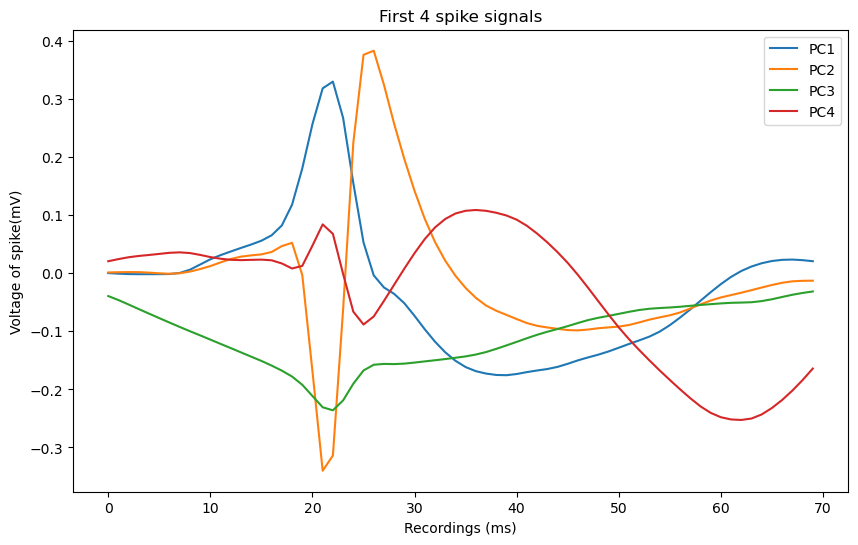

In [13]:
# TODO plot PCs

# Generate a 2D plot to display the first 4 principal components in one plot
# each column of evecs is a principal component
print(evecs.shape)
plt.figure(figsize=(10, 6))
plt.plot(evecs[:, 0], label='PC1') # x axis is the index of the row, y axis is the value of the row
# plt.plot(list(range(1, 71)), evecs[:, 0], label='PC1')
plt.plot(evecs[:, 1], label='PC2')
plt.plot(evecs[:, 2], label='PC3')
plt.plot(evecs[:, 3], label='PC4')
plt.xlabel('Recordings (ms)')
plt.ylabel('Voltage of spike(mV)')
plt.title('First 4 spike signals')
plt.legend()
plt.show()


2. [1 pt] Write code to verify that the first 4 principal components are indeed orthogonal.

In [20]:
# TODO verify
evecs_first_4 = evecs[:, :4]
print(evecs_first_4.shape)

# Calculate the dot product of the components
dot_product = evecs_first_4.T @ evecs_first_4
is_orthogonal = np.allclose(dot_product, np.eye(4))
# Check that the dot product matrix is close to the identity matrix
dot_product = evecs_first_4 @ evecs_first_4.T
print(dot_product.shape)
print(dot_product)
is_orthogonal = np.allclose(dot_product, np.eye(70))

print(is_orthogonal) # should be True

(70, 4)
(70, 70)
[[ 0.00197221  0.00231948  0.00268987 ... -0.00274329 -0.00248847
  -0.00217977]
 [ 0.00231948  0.00272901  0.00316538 ... -0.00325536 -0.00295431
  -0.00258914]
 [ 0.00268987  0.00316538  0.0036724  ... -0.00364357 -0.00330679
  -0.00289612]
 ...
 [-0.00274329 -0.00325536 -0.00364357 ...  0.04293384  0.03912531
   0.03497877]
 [-0.00248847 -0.00295431 -0.00330679 ...  0.03912531  0.03565602
   0.03187848]
 [-0.00217977 -0.00258914 -0.00289612 ...  0.03497877  0.03187848
   0.02850397]]
False


## 3.2 Signal reconstruction without sklearn
Because the principal components form an basis, each spike can be reconstructed using some weighted sum of the principal components. In this subsection, do not use sklearn package.

**How to reconstruct?** For example, if we are reconstructing the spike with the first $k$ PC, you will project the spike to these principal components with 
$$U_{1:k} U_{1:k}^TX$$
where $U_{1:k}$ is the matrix with first $k$ PCs on each column and $X$ is the spike (column vector).

**Task:**

In the same figure,
1. [1 pt] Plot the first spike, ```spike01```, by indexing the correct row/column of `X_ctd`. 
    - Use solid line to differentiate it more easily from the next plots below.
2. [2 pt] Reconstruct an approximation to ```spike01``` using the first prinicpal component only. 
    - Remember, we are using only one component, so the reconstruction will not be precise, it is only approximate. Use dashed lines to differentiate it from the true ```spike01```.
3. [1 pt] Then repeat the reconstruction of ```spike01``` using the first two, first three, first four, and finally all principal components. Might help to use a for-loop.

4. [1 pt] Your plots should include title, legend, axis labels.

You final plot should have 6 plots:
1. original spike
2. Approximate reconstruction with 1 PC
2. Approximate reconstruction with 2 PC
2. Approximate reconstruction with 3 PC
2. Approximate reconstruction with 4 PC
2. Approximate reconstruction with 70 PC

data shape: (3298, 70)
(70,)
evecs shape: (70, 70)
U first pc:  (70, 1)
reconstructed_spike01:  (70,)
U with 2 PCs:  (70, 2)
spike01_reconstructed_2pcs:  (70,)
U with 3 PCs:  (70, 3)
spike01_reconstructed_3pcs:  (70,)
U with 4 PCs:  (70, 4)
spike01_reconstructed_4pcs:  (70,)
U with 70 PCs:  (70, 70)
spike01_reconstructed_70pcs:  (70,)


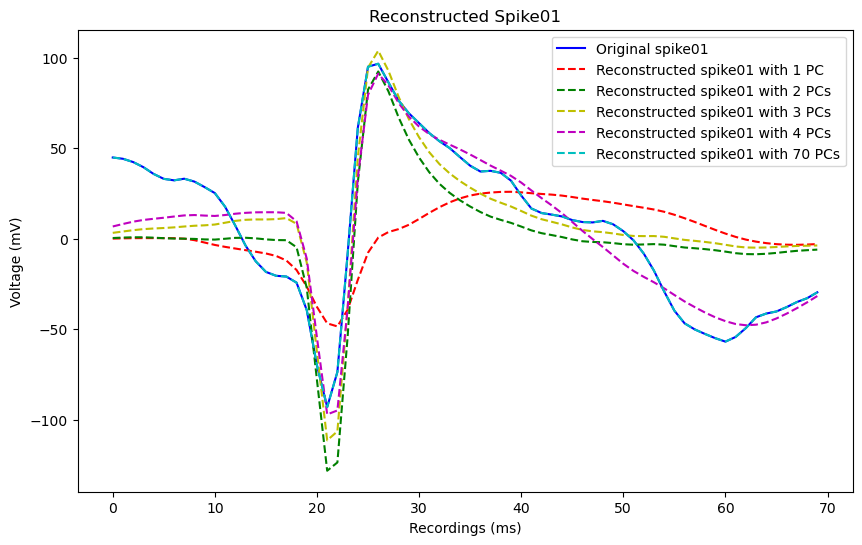

In [15]:
# TODO plot
# Assuming spike01 is the first spike and evecs is the matrix of principal components
print('data shape:',data_ctd.shape)
spike01 = data_ctd[0, :]  # first spike is the first row of the data matrix
print(spike01.shape) # should be a 70x1 vector

# 1. Plot the first spike
plt.figure(figsize=(10, 6))
plt.plot(spike01, 'b-', label='Original spike01') # x axis is the index of the row, y axis is the value of the row

# 2. Reconstruct an approximation to spike01 using the first principal component
print('evecs shape:',evecs.shape)
U = evecs[:, 0].reshape(-1,1)  # First principal component # should be a 70x1 vector
print('U first pc: ',U.shape) # should be a 70x1 vector
reconstructed_spike01 = np.dot(np.dot(U, U.T), spike01) # should be a 70x1 vector
# if only spike01 then it would be 70x1 * 1x70 * 70x1
print('reconstructed_spike01: ',reconstructed_spike01.shape) # should be a 70x1 vector

plt.plot(reconstructed_spike01, 'r--', label='Reconstructed spike01 with 1 PC')

# 3. Reconstruct an approximation to spike01 using the first two principal components
U_2pcs = evecs[:, :2] # First two principal components # should be a 70x2 matrix
print('U with 2 PCs: ', U_2pcs.shape)
spike01_reconstructed_2pcs = np.dot(np.dot(U_2pcs, U_2pcs.T), spike01) # should be a 70x1 vector
print('spike01_reconstructed_2pcs: ', spike01_reconstructed_2pcs.shape)
plt.plot(spike01_reconstructed_2pcs, 'g--', label='Reconstructed spike01 with 2 PCs')

# 3. Reconstruct an approximation to spike01 using the first three principal components
U_3pcs = evecs[:, :3] # First three principal components # should be a 70x3 matrix
print('U with 3 PCs: ', U_3pcs.shape)
spike01_reconstructed_3pcs = np.dot(np.dot(U_3pcs, U_3pcs.T), spike01) # should be a 70x1 vector
print('spike01_reconstructed_3pcs: ', spike01_reconstructed_3pcs.shape)
plt.plot(spike01_reconstructed_3pcs, 'y--', label='Reconstructed spike01 with 3 PCs')

# 3. Reconstruct an approximation to spike01 using the first four principal components
U_4pcs = evecs[:, :4] # First four principal components # should be a 70x4 matrix
print('U with 4 PCs: ', U_4pcs.shape)
spike01_reconstructed_4pcs = np.dot(np.dot(U_4pcs, U_4pcs.T), spike01) # should be a 70x1 vector
print('spike01_reconstructed_4pcs: ', spike01_reconstructed_4pcs.shape)
plt.plot(spike01_reconstructed_4pcs, 'm--', label='Reconstructed spike01 with 4 PCs')

# 3. Reconstruct an approximation to spike01 using all 70 principal components
U_70pcs = evecs[:,:] # all 70 principal components # should be a 70x70 matrix
print('U with 70 PCs: ', U_70pcs.shape)
spike01_reconstructed_70pcs = np.dot(np.dot(U_70pcs, U_70pcs.T), spike01) # should be a 70x1 vector
# 70x1 * 1x70 * 70x1
print('spike01_reconstructed_70pcs: ', spike01_reconstructed_70pcs.shape)
plt.plot(spike01_reconstructed_70pcs, 'c--', label='Reconstructed spike01 with 70 PCs')
plt.xlabel('Recordings (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Reconstructed Spike01')
plt.legend()
plt.show()


## 3.3 Data projection with sklearn

**Task:**
1. [1 pt] Project the centered data ```X_ctd``` onto the principal components using an appropriate method in the sklearn PCA pacakage, store it is ```X_proj```.
    - X_proj should have dimensions 70 by 3298. You may need to take transposes accordingly.
2. [2 pt] What is the interpretation of `X_proj[0,:]`? What does each entry represent? Similarly, what is the interpretation of `X_proj[i,:]` for arbitrary row i?

    **Ans:** `X_proj[0,:]` is the projection of the data onto the first principal component. Each entry represents the projection of a spike onto the first principal component. Similarly, `X_proj[i,:]` is the projection of the data onto the i-th principal component . Each entry represents the projection of a spike onto the i-th principal component.

In [16]:
# TODO project
print("X shape:",X.shape)

X -= X.mean(axis=0, keepdims=True) # center the data

pca = PCA(n_components=70) # create a PCA object
pca.fit(X) # fit the PCA object to the data
eigenvalues = pca.explained_variance_ # get the eigenvalues
eigenvectors = pca.components_ # get the eigenvectors

print('eigenvalues shape:',eigenvalues.shape)
print('eigenvectors shape:',eigenvectors.shape)

eigenvectors = eigenvectors.T # each column is a eigenvector

# project the data onto the first 4 principal components
X_proj_70 = X @ eigenvectors @ eigenvectors.T # project the data onto all 70 principal components
# 3298x70 * 70x70 * 70x70
 
X_proj = pca.transform(X) # project the data onto all 70 principal components
print('X_proj shape:',X_proj.shape)
# transform works by performing the following steps:
# 1. Center the data by subtracting the mean
# 2. Project the data onto the principal components in order to collapse the data onto a lower dimensional space
#  we have 70 features, so the projected data will collapse to 70 dimensions
# 3. Uncenter the data by adding the mean back
# The result is the projected data in the orginal feature space with the variatians in the other dimensions removed and projected onto the principal components
# this changes the standarde basis to the basis of the principal components
X_proj = X_proj.T


allclose = np.allclose(X_proj_70.T, X_proj) # check if the projected data is close to the original data
print(allclose) # should be True

print(X_proj.shape)

X shape: (3298, 70)
eigenvalues shape: (70,)
eigenvectors shape: (70, 70)
X_proj shape: (3298, 70)
False
(70, 3298)


# 4 Dimensionality reduction
## 4.1 Histogram
[2 pt] On separate figures:
- plot a histogram of `X_proj[0,:]`
- plot a histogram of `X_proj[1,:]`

Set:
- 50 bins equispaced between [-550,550]

So, each histogram uses 3298 datapoints.

(2, 3298)
(3298,)


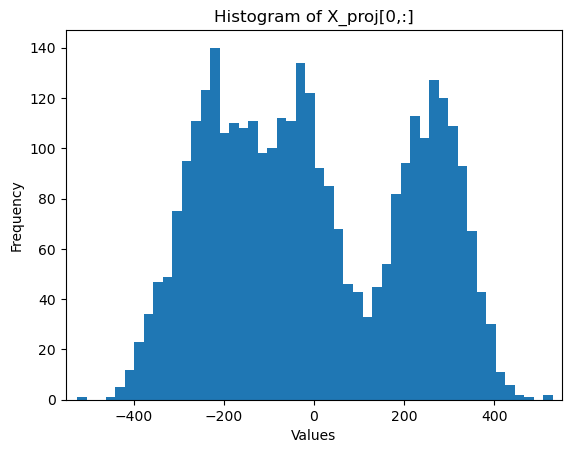

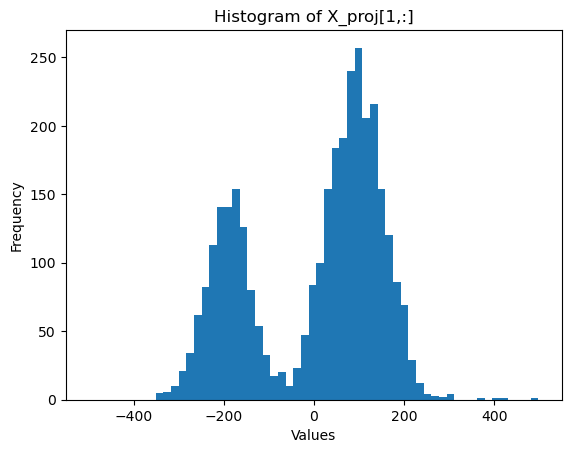

In [17]:
# TODO show a histogram of the first principal component
print(X_proj[:2,:].shape)
print(X_proj[0].shape)

plt.hist(X_proj[0,:], bins=50)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim(-550, 550)
plt.title('Histogram of X_proj[0,:]')
plt.show()

# TODO show a histogram of the second principal component 

plt.hist(X_proj[1,:], bins=50)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim(-550, 550)
plt.title('Histogram of X_proj[1,:]')
plt.show()


## 4.2 Visualize data with PC1 and PC2
1. [2 pt] Create scatter plot of the data projected onto the first two principal components.
    - y axis: PC2
    - x axis: PC1
    - Include title, axis labels

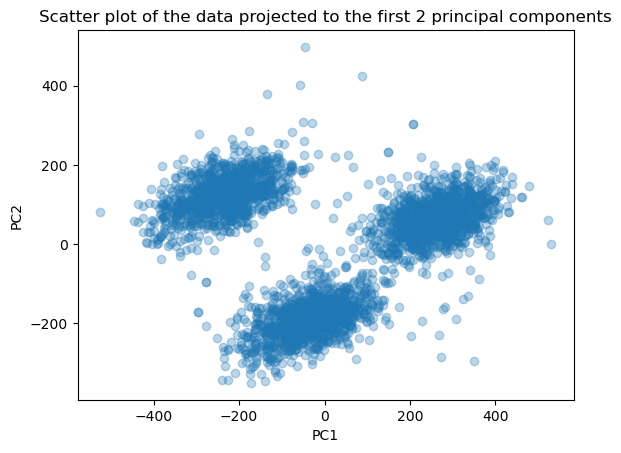

In [18]:
# TODO scatter
# Scatter plot of the first two principal components
plt.figure()
plt.scatter(X_proj[0], X_proj[1], alpha=0.3)
plt.xlabel('PC1')
plt.ylabel('PC2') 
plt.title('Scatter plot of the data projected to the first 2 principal components')
plt.show()



2. [1 pt] What does the scatter plot suggest about the number of potential neuronal clusters?

    **Ans:** The scatter plot suggests that there are three potential neuronal clusters.
    